Amy Fan 11-2022

# Weapons Analysis

WHILE THE NUMBER OF ASSAULTS REMAINED RELATIVELY FLAT OR DECREASED IN MOST COMMUNITIES WE LOOKED AT

AGGRAVATED ASSAULTS WITH WEAPONS WENT UP IN NEARLY THREE OUT OF EVERY FOUR COMMUNITIES.

WHEN WE LOOKED DEEPER INTO DIFFERENT WEAPON TYPES: (show the different lines flat or slightly up – knives, blunt force objects, bodily weapons)
WE FOUND THAT ONE WAS DRIVING MOST OF THE INCREASE –GUNS. 

NEARLY 80 PERCENT OF COMMUNITIES IN THE U.S. THAT DID REPORT DATA... SHOW AN INCREASE IN THE PERCENTAGE OF ASSAULTS INVOLVING A FIREARM.

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

source = "..//..//..//youth-crime//data//source//"
processed = "..//..//data//processed//"
manual = "..//..//..//youth-crime//data//manual//"

all_weapons = ['knife/cutting instrument (ice pick, screwdriver, ax, etc.)',
#       'personal weapons (hands, feet, teeth, etc.)', 
       'other',
       'blunt object (club, hammer, etc.)', 'motor vehicle', 'unknown',
       'asphyxiation (by drowning, strangulation, suffocation, gas, etc.)',
       'drugs/narcotics/sleeping pills', 'explosives',
       'fire/incendiary device', 'poison (include gas)', 
       'firearm']

In [2]:
start_yr = 2019
end_yr = 2021

years = list(range(start_yr, end_yr + 1))
year_cols = pd.Series(years).apply(lambda x: str(x))

In [3]:
s = []

for year in years: 

    w_str = processed + "weapons_" + str(year) + ".csv"
    
    w = pd.read_csv(w_str)
    w = w[w.population>50000]
    w['year'] = year
    
    s.append(w)


/var/folders/cs/6tsmkts96lqgd7z7tz4b521sl4vb6k/T/ipykernel_97030/2128157456.py:7: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,14,16,17,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  w = pd.read_csv(w_str)
/var/folders/cs/6tsmkts96lqgd7z7tz4b521sl4vb6k/T/ipykernel_97030/2128157456.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w['year'] = year
/var/folders/cs/6tsmkts96lqgd7z7tz4b521sl4vb6k/T/ipykernel_97030/2128157456.py:7: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,14,16,17,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  w = pd.read_csv(w_str)
/var/folders/cs/6tsmkts96lqgd7z7tz4b521sl4vb6k/T/ipykernel_97030/2128157456.py:9: SettingWithCopyWarning: 
A valu

In [4]:
s_yrs = pd.concat(s, axis = 0)

In [5]:
pop_cols = ['ori', 'population']
pop_list = []

for year in years: 
    
    bh_str = source + "nibrs_1991_2021_batch_header_dta//nibrs_batch_header_" + str(year) + ".dta"

    bh = pd.read_stata(bh_str, columns = pop_cols)
    bhs = bh[bh.ori.isin(s_yrs.ori.unique())].set_index('ori')
    
    pop_list.append(bhs)

pops = pd.concat(pop_list, axis=1)
pops.columns = year_cols + "_pop"
pops.head()

,2019_pop,2020_pop,2021_pop
ori,,,
AR0040100,53434,57575.0,60329
AR0040200,69168,70194.0,72122
AR0160100,78261,79702.0,81208
AR0230100,67336,68599.0,69018
AR0260000,61975,60870.0,60542


# WHILE THE NUMBER OF ASSAULTS REMAINED RELATIVELY FLAT OR DECREASED IN ABOUT HALF OF THE COMMUNITIES WE LOOKED AT


In [6]:
assault_codes = ['aggravated assault', 'simple assault', 'intimidation']
assaults = s_yrs[s_yrs.ucr_offense_code.isin(assault_codes)]
assaults.shape

(2788353, 47)

In [7]:
assaults.head()

,Unnamed: 0.1,Unnamed: 0,ori,agency_name,agency_type_name,state_name,state_abbr,division_name,region_name,region_desc,county_name,nibrs,latitude,longitude,nibrs_start_date,population,city_name,population_group,ucr_offense_code,type_weapon_force_involved_1,automatic_weapon_indicator_1,type_weapon_force_involved_2,automatic_weapon_indicator_2,type_weapon_force_involved_3,automatic_weapon_indicator_3,location_type,unique_incident_id,Unnamed: 27,"personal weapons (hands, feet, teeth, etc.)",none,motor vehicle,"knife/cutting instrument (ice pick, screwdriver, ax, etc.)",shotgun,handgun,rifle,firearm (type not stated),unknown,other,"blunt object (club, hammer, etc.)",drugs/narcotics/sleeping pills,other firearm,"asphyxiation (by drowning, strangulation, suffocation, gas, etc.)",explosives,poison (include gas),fire/incendiary device,firearm,year
7487,7487,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.38833,-94.21991,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",simple assault,none,NaN,NaN,NaN,NaN,NaN,construction site,AR0040100 2W1WPU7 6288,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019
7494,7494,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.38833,-94.21991,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,handgun,NaN,NaN,NaN,NaN,NaN,highway/road/alley,AR0040100 2W1WPU7 64BI,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,2019
7504,7504,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.38833,-94.21991,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",simple assault,"personal weapons (hands, feet, teeth, etc.)",NaN,NaN,NaN,NaN,NaN,other/unknown,AR0040100 2W1WPU7 66KW,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019
7508,7508,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.38833,-94.21991,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,"knife/cutting instrument (ice pick, screwdrive...",NaN,NaN,NaN,NaN,NaN,department/discount store,AR0040100 2W1WPU7 6L2I,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019
7513,7513,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.38833,-94.21991,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",intimidation,NaN,NaN,NaN,NaN,NaN,NaN,commercial/office building,AR0040100 2W1WPU7 6Y 4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019


In [8]:
a_counts = assaults.groupby(['year', 'ori'])['unique_incident_id'].count().reset_index()

In [9]:
a_pivot = pd.pivot_table(a_counts, index = 'ori', values = 'unique_incident_id', columns ='year')
a_pivot.head()

year,2019,2020,2021
ori,,,
AR0040100,398.0,438.0,467.0
AR0040200,852.0,740.0,699.0
AR0160100,1577.0,1762.0,1678.0
AR0230100,1243.0,1240.0,1308.0
AR0260000,518.0,472.0,433.0


<AxesSubplot: xlabel='year'>

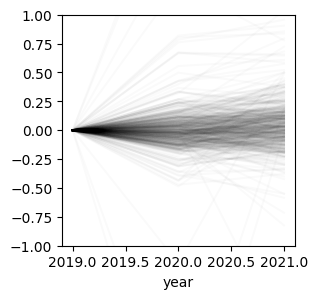

In [10]:
np.log(a_pivot.divide(a_pivot[2019], axis=0)).T.plot(legend=None, ylim=(-1,1), figsize=(3,3), alpha=0.02, color = "k")


In [11]:
np.log(a_pivot.divide(a_pivot[2019], axis=0))[2021].describe(percentiles = [0.25,0.3, 0.45, 0.55, 0.6, 0.75])

count    519.000000
mean       0.056220
std        0.281557
min       -1.794629
25%       -0.075220
30%       -0.053739
45%        0.010516
50%        0.033673
55%        0.056822
60%        0.078950
75%        0.147644
max        2.531304
Name: 2021, dtype: float64

In [12]:
# let's merge in pop info
a_merged = pd.concat([a_pivot, pops], axis =1)
a_merged.head()

,2019,2020,2021,2019_pop,2020_pop,2021_pop
ori,,,,,,
AR0040100,398.0,438.0,467.0,53434,57575.0,60329
AR0040200,852.0,740.0,699.0,69168,70194.0,72122
AR0160100,1577.0,1762.0,1678.0,78261,79702.0,81208
AR0230100,1243.0,1240.0,1308.0,67336,68599.0,69018
AR0260000,518.0,472.0,433.0,61975,60870.0,60542


In [13]:
def calc_perc_capita(df, col, pc_col): 
    
    df['2019pc'] = df[2019]/df['2019_pop']
    df['2020pc'] = df[2020]/df['2020_pop']
    df['2021pc'] = df[2021]/df['2021_pop']
    
    df[col] = df[2021]/df[2019]
    df[pc_col] = df['2021pc']/df['2019pc']
    
    return df

In [14]:
a_pc = calc_perc_capita(a_merged, "perc_21_19", "perc_pc_21_19")
a_pc.perc_21_19.describe(percentiles = [0.25,0.3, 0.45, 0.55, 0.6, 0.75])

count    519.000000
mean       1.120730
std        0.715298
min        0.166189
25%        0.927539
30%        0.947680
45%        1.010574
50%        1.034247
55%        1.058467
60%        1.082151
75%        1.159100
max       12.569892
Name: perc_21_19, dtype: float64

In [15]:
sum(a_pc.perc_21_19<1.05)/len(a_pc.perc_21_19)

0.5315487571701721

In [16]:
a_pc.perc_pc_21_19.describe(percentiles = [0.25,0.3, 0.45, 0.55, 0.6, 0.75])

count    519.000000
mean       1.102665
std        0.700658
min        0.159283
25%        0.912120
30%        0.932602
45%        0.996508
50%        1.018473
55%        1.033179
60%        1.061142
75%        1.141945
max       12.121794
Name: perc_pc_21_19, dtype: float64

In [17]:
sum(a_pc.perc_pc_21_19<1.05)/len(a_pc.perc_pc_21_19)

0.5697896749521989

In [18]:
a_pc[~np.isnan(a_pc.perc_pc_21_19)].to_csv("0_assaults_change.csv")

In [81]:
a_pc[['2019pc','2020pc', '2021pc']].median()

2019pc    0.008476
2020pc    0.008499
2021pc    0.008836
dtype: float64

# ASSAULTS WITH WEAPONS WENT UP IN NEARLY THREE OUT OF EVERY FOUR COMMUNITIES WE LOOKED AT

In [19]:
assaults['w'] = (assaults[all_weapons].sum(axis=1) >= 1)

/var/folders/cs/6tsmkts96lqgd7z7tz4b521sl4vb6k/T/ipykernel_97030/1107137100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assaults['w'] = (assaults[all_weapons].sum(axis=1) >= 1)


In [20]:
aw = assaults[assaults.w]
aw = aw[aw.ucr_offense_code=="aggravated assault"]
aw.head(50)

,Unnamed: 0.1,Unnamed: 0,ori,agency_name,agency_type_name,state_name,state_abbr,division_name,region_name,region_desc,county_name,nibrs,latitude,longitude,nibrs_start_date,population,city_name,population_group,ucr_offense_code,type_weapon_force_involved_1,automatic_weapon_indicator_1,type_weapon_force_involved_2,automatic_weapon_indicator_2,type_weapon_force_involved_3,automatic_weapon_indicator_3,location_type,unique_incident_id,Unnamed: 27,"personal weapons (hands, feet, teeth, etc.)",none,motor vehicle,"knife/cutting instrument (ice pick, screwdriver, ax, etc.)",shotgun,handgun,rifle,firearm (type not stated),unknown,other,"blunt object (club, hammer, etc.)",drugs/narcotics/sleeping pills,other firearm,"asphyxiation (by drowning, strangulation, suffocation, gas, etc.)",explosives,poison (include gas),fire/incendiary device,firearm,year,w
7494,7494,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,handgun,NaN,NaN,NaN,NaN,NaN,highway/road/alley,AR0040100 2W1WPU7 64BI,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,2019,True
7508,7508,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,"knife/cutting instrument (ice pick, screwdrive...",NaN,NaN,NaN,NaN,NaN,department/discount store,AR0040100 2W1WPU7 6L2I,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,True
7577,7577,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,other,NaN,NaN,NaN,NaN,NaN,residence/home,AR0040100 2W1WPU7 8L68,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2019,True
7908,7908,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,"blunt object (club, hammer, etc.)",NaN,NaN,NaN,NaN,NaN,residence/home,AR0040100 2W1WPU727LXD,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2019,True
8010,8010,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,motor vehicle,NaN,NaN,NaN,NaN,NaN,highway/road/alley,AR0040100 2W1WPU72I4K,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019,True
8059,8059,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,unknown,NaN,NaN,NaN,NaN,NaN,residence/home,AR0040100 2W1WPU72IYT8,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,2019,True
8071,8071,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",aggravated assault,other firearm,NaN,NaN,NaN,NaN,NaN,residence/home,AR0040100 2W1WPU72JCTN,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,2019,True
8113,8113,6885.0,AR0040100,Bentonville Police Department,City,Arkansas,AR,West South Central,South,Region III,BENTON,True,36.388330,-94.219910,01/01/2008,60329.0,BENTONVILLE,"city 50,000 thru 99,999",

In [21]:
aw_counts = aw.groupby(['year','ori'])['unique_incident_id'].count().reset_index()
aw_counts.head()

,year,ori,unique_incident_id
0,2019,AR0040100,34
1,2019,AR0040200,110
2,2019,AR0160100,156
3,2019,AR0230100,109
4,2019,AR0260000,56


In [22]:
aw_pivot = pd.pivot_table(aw_counts, index = 'ori', values = 'unique_incident_id', columns ='year')
aw_pivot.head()

year,2019,2020,2021
ori,,,
AR0040100,34.0,59.0,40.0
AR0040200,110.0,86.0,92.0
AR0160100,156.0,192.0,188.0
AR0230100,109.0,136.0,130.0
AR0260000,56.0,78.0,83.0


<AxesSubplot: xlabel='year'>

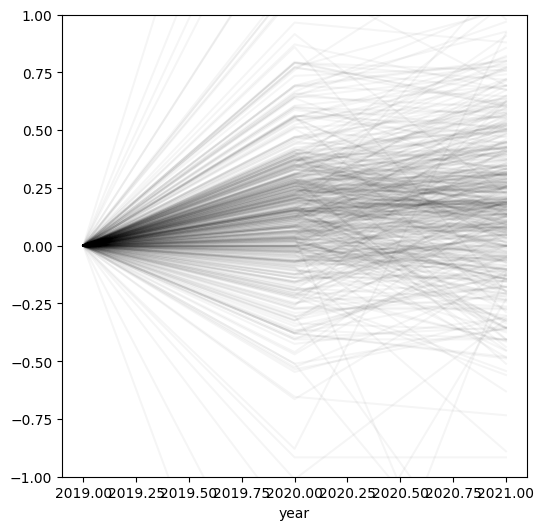

In [23]:
np.log(aw_pivot.divide(aw_pivot[2019], axis=0)).T.plot(legend=None, ylim=(-1,1), figsize=(6,6), alpha=0.04, color = "k")

In [24]:
# let's merge in pop info
aw_merged = pd.concat([aw_pivot, pops], axis =1)
aw_merged.head()

,2019,2020,2021,2019_pop,2020_pop,2021_pop
ori,,,,,,
AR0040100,34.0,59.0,40.0,53434,57575.0,60329
AR0040200,110.0,86.0,92.0,69168,70194.0,72122
AR0160100,156.0,192.0,188.0,78261,79702.0,81208
AR0230100,109.0,136.0,130.0,67336,68599.0,69018
AR0260000,56.0,78.0,83.0,61975,60870.0,60542


In [25]:
aw_pc = calc_perc_capita(aw_merged, "perc_21_19", "perc_pc_21_19")
aw_pc.perc_21_19.describe(percentiles = [0.25, 0.3, 0.35, 0.4, 0.45, 0.55, 0.6, 0.75])

count    519.000000
mean       1.365536
std        1.181833
min        0.120000
25%        1.000000
30%        1.052549
35%        1.093750
40%        1.137130
45%        1.171147
50%        1.204545
55%        1.235758
60%        1.291950
75%        1.486151
max       22.250000
Name: perc_21_19, dtype: float64

In [26]:
sum(aw_pc.perc_21_19 >= 1)/len(aw_pc)

0.7495219885277247

In [27]:
aw_pc.perc_pc_21_19.describe(percentiles = [0.25, 0.3, 0.35, 0.4, 0.45, 0.55, 0.6, 0.75])

count    519.000000
mean       1.344260
std        1.153915
min        0.115013
25%        0.991638
30%        1.030998
35%        1.081514
40%        1.115793
45%        1.147476
50%        1.180690
55%        1.216120
60%        1.267185
75%        1.460454
max       21.456820
Name: perc_pc_21_19, dtype: float64

In [61]:
sum(aw_pc.perc_pc_21_19 > 1)/len(aw_pc)

0.734225621414914

In [29]:
aw[aw.type_weapon_force_involved_1== "personal weapons (hands, feet, teeth, etc.)"].head(50)

,Unnamed: 0.1,Unnamed: 0,ori,agency_name,agency_type_name,state_name,state_abbr,division_name,region_name,region_desc,county_name,nibrs,latitude,longitude,nibrs_start_date,population,city_name,population_group,ucr_offense_code,type_weapon_force_involved_1,automatic_weapon_indicator_1,type_weapon_force_involved_2,automatic_weapon_indicator_2,type_weapon_force_involved_3,automatic_weapon_indicator_3,location_type,unique_incident_id,Unnamed: 27,"personal weapons (hands, feet, teeth, etc.)",none,motor vehicle,"knife/cutting instrument (ice pick, screwdriver, ax, etc.)",shotgun,handgun,rifle,firearm (type not stated),unknown,other,"blunt object (club, hammer, etc.)",drugs/narcotics/sleeping pills,other firearm,"asphyxiation (by drowning, strangulation, suffocation, gas, etc.)",explosives,poison (include gas),fire/incendiary device,firearm,year,w
30696,30696,6881.0,AR0160100,Jonesboro Police Department,City,Arkansas,AR,West South Central,South,Region III,CRAIGHEAD,True,35.838394,-90.708170,08/01/2003,81208.0,JONESBORO,"city 50,000 thru 99,999",aggravated assault,"personal weapons (hands, feet, teeth, etc.)",NaN,"asphyxiation (by drowning, strangulation, suff...",NaN,NaN,NaN,residence/home,AR0160100 1G-HQUO2HG1A,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2019,True
34114,34114,6881.0,AR0160100,Jonesboro Police Department,City,Arkansas,AR,West South Central,South,Region III,CRAIGHEAD,True,35.838394,-90.708170,08/01/2003,81208.0,JONESBORO,"city 50,000 thru 99,999",aggravated assault,"personal weapons (hands, feet, teeth, etc.)",NaN,"asphyxiation (by drowning, strangulation, suff...",NaN,NaN,NaN,school - elementary/secondary,AR0160100 CF-0WONW0FCT,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2019,True
157243,157243,6766.0,AR0600300,North Little Rock Police Department,City,Arkansas,AR,West South Central,South,Region III,PULASKI,True,34.779230,-92.269780,02/01/2003,66677.0,NORTH LITTLE ROCK,"city 50,000 thru 99,999",aggravated assault,"personal weapons (hands, feet, teeth, etc.)",NaN,"asphyxiation (by drowning, strangulation, suff...",NaN,NaN,NaN,residence/home,AR0600300 2W1WPHXUS71A,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2019,True
157763,157763,6766.0,AR0600300,North Little Rock Police Department,City,Arkansas,AR,West South Central,South,Region III,PULASKI,True,34.779230,-92.269780,02/01/2003,66677.0,NORTH LITTLE ROCK,"city 50,000 thru 99,999",aggravated assault,"personal weapons (hands, feet, teeth, etc.)",NaN,"asphyxiation (by drowning, strangulation, suff...",NaN,NaN,NaN,residence/home,AR0600300 2W1WPKZPZX1A,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,2019,True
167782,167782,6818.0,AR0630000,Saline County Sheriff's Office,County,Arkansas,AR,West South Central,South,Region III,SALINE,True,34.556995,-92.577630,01/01/2011,52870.0,BENTON,"msa-county 25,000 thru 99,999",aggravated assault,"personal weapons (hands, feet, teeth, etc.)",NaN,other,NaN,NaN,NaN,residence/home,AR0630000 5F1FQ4WPIRVS,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2019,True
181119,181119,6796.0,AR0660100,Fort Smith Police Department,City,Arkansas,AR,West South Central,South,Region III,SEBASTIAN,True,35.383170,-94.423400,12/01/2002,87912.0,FORT SMITH,"city 50,000 thru 99,999",aggravated assault,"personal weapons (hands, feet, teeth, etc.)",NaN,other,NaN,NaN,NaN,residence/home,AR0660100 1G0HP4FN8NJA,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2019,True
194143,194143,6815.0,AR0720100,Fayetteville Police Department,City,Arkansas,AR,West South Central,South,Region III,WASHINGTON,True,36.060850,-94.157270,09/01/2003,91309.0,FAYETTEVILLE,"city 50,000 thru 99,999",aggravated as

In [64]:
aw_pc[aw_pc.perc_21_19>1].head()
aw_pc['increase'] = (aw_pc.perc_21_19>1) * 1
aw_pc[[2019, 2021, 'increase']].to_csv('aw_increase.csv')

In [31]:
sum(aw_pc.perc_pc_21_19>1.05)/len(aw_pc.perc_pc_21_19)

0.6711281070745698

oop this might be wrong 

# WHEN WE LOOKED DEEPER INTO DIFFERENT WEAPON TYPES: (show the different lines flat or slightly up – knives, blunt force objects, bodily weapons) WE FOUND THAT ONE WAS DRIVING MOST OF THE INCREASE –GUNS. 

In [32]:
we = 'firearm'

weap_counts = aw.groupby(['year','ori', 'agency_name'])[we].sum().reset_index()

#we = 'nf'
# aw['nf'] = ~aw['firearm']
#weap_counts = aw.groupby(['year','ori'])['nf'].sum().reset_index()
weap_counts.head()

,year,ori,agency_name,firearm
0,2019,AR0040100,Bentonville Police Department,7
1,2019,AR0040200,Rogers Police Department,41
2,2019,AR0160100,Jonesboro Police Department,81
3,2019,AR0230100,Conway Police Department,46
4,2019,AR0260000,Garland County Sheriff's Office,14


In [33]:
weap_pivot = pd.pivot_table(weap_counts, index = ['ori', 'agency_name'], values = we, columns ='year')
weap_pivot.head()

# let's merge in pop info
weap_merged = pd.concat([weap_pivot, a_pivot], axis =1)
weap_merged.columns = [2019, 2020, 2021, '2019_pop', '2020_pop', '2021_pop']
weap_merged.head()

,,2019,2020,2021,2019_pop,2020_pop,2021_pop
ori,,,,,,,
AR0040100,Bentonville Police Department,7.0,13.0,5.0,NaN,NaN,NaN
AR0040200,Rogers Police Department,41.0,22.0,29.0,NaN,NaN,NaN
AR0160100,Jonesboro Police Department,81.0,106.0,99.0,NaN,NaN,NaN
AR0230100,Conway Police Department,46.0,56.0,59.0,NaN,NaN,NaN
AR0260000,Garland County Sheriff's Office,14.0,29.0,35.0,NaN,NaN,NaN


In [34]:
np.log(weap_merged[years].sum()/weap_merged[years].sum()[2019])

2019    0.00000
2020    0.35527
2021    0.45240
dtype: float64

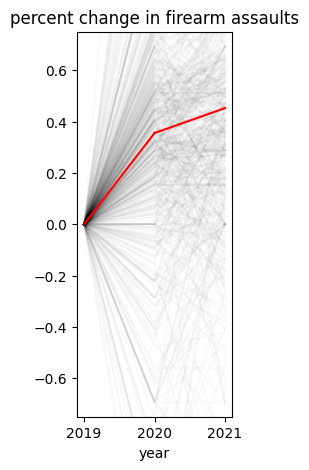

In [38]:
np.log(weap_pivot.divide(weap_pivot[2019], axis=0)).T.plot(legend=None, ylim=(-.75,.75), figsize=(2,5), alpha=0.02, color = "k")
plt.title('percent change in firearm assaults')
plt.plot([2019, 2020], [0, 0.35527], color = "red")
plt.plot([2020, 2021], [0.35527, 0.45240], color = "red")

In [54]:
weap_pivot[~(weap_pivot[2019]<weap_pivot[2021])]

,year,2019,2020,2021
ori,agency_name,,,
AR0040100,Bentonville Police Department,7.0,13.0,5.0
AR0040200,Rogers Police Department,41.0,22.0,29.0
AR0720200,Springdale Police Department,NaN,NaN,39.0
CO0070000,Boulder County Sheriff's Office,18.0,10.0,18.0
CO0180100,Castle Rock Police Department,0.0,1.0,0.0
CO0350000,Larimer County Sheriff's Office,26.0,21.0,26.0
CO0510000,Pueblo County Sheriff's Office,8.0,4.0,7.0
CO0620000,Weld County Sheriff's Office,27.0,39.0,27.0
CT0001500,Bridgeport Police Department,116.0,127.0,101.0


In [56]:
sum(np.isnan(weap_pivot[2019]))

4

In [51]:
weap_pivot.shape

(523, 3)

In [39]:
weap_pc = calc_perc_capita(weap_merged, "perc_21_19", "perc_pc_21_19")
weap_pc.perc_21_19.describe(percentiles = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.55, 0.6, 0.75])

count    514.000000
mean            inf
std             NaN
min        0.000000
15%        0.961378
20%        1.000000
25%        1.125000
30%        1.200000
35%        1.297353
40%        1.333333
45%        1.411005
50%        1.467708
55%        1.555556
60%        1.635758
75%        1.933094
max             inf
Name: perc_21_19, dtype: float64

In [66]:
sum(weap_pc.perc_21_19 >= 1.75)

170

In [68]:
weap_pc[[2019, 2021, 'perc_21_19']].to_csv("firearm_aa.csv")

In [69]:
weap_pc['inc'] = (weap_pc.perc_21_19>1)*1
weap_pc['inc'].to_csv("firearm_aa_inc.csv")

In [60]:
weap_pc.perc_pc_21_19.describe(percentiles = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.55, 0.6, 0.75])

count    0.0
mean     NaN
std      NaN
min      NaN
15%      NaN
20%      NaN
25%      NaN
30%      NaN
35%      NaN
40%      NaN
45%      NaN
50%      NaN
55%      NaN
60%      NaN
75%      NaN
max      NaN
Name: perc_pc_21_19, dtype: float64

In [ ]:
weap_pc.to_csv('firearm.csv')

# non

In [82]:
len(s_yrs.ori.unique())

523

In [92]:
aw['other/unknown'] = (aw['other'] + aw['unknown'] > 0)

In [100]:
all_weapons = ['knife/cutting instrument (ice pick, screwdriver, ax, etc.)',
#       'personal weapons (hands, feet, teeth, etc.)', 
#       'other',
       'blunt object (club, hammer, etc.)', 'motor vehicle', # 'unknown',
       'asphyxiation (by drowning, strangulation, suffocation, gas, etc.)',
       'drugs/narcotics/sleeping pills', 'explosives',
       'fire/incendiary device', 'poison (include gas)', 
       'firearm', 'other/unknown']

In [101]:
aw.groupby('year')[all_weapons].sum()

,"knife/cutting instrument (ice pick, screwdriver, ax, etc.)","blunt object (club, hammer, etc.)",motor vehicle,"asphyxiation (by drowning, strangulation, suffocation, gas, etc.)",drugs/narcotics/sleeping pills,explosives,fire/incendiary device,poison (include gas),firearm,other/unknown
year,,,,,,,,,,
2019,32794,20775,10184,4456,210,69,358,309,53912,19701
2020,35449,23212,11424,6705,185,132,460,358,76909,18791
2021,34519,22207,11845,8025,241,95,491,418,84754,18985


In [102]:
aw.year.value_counts().sort_values()

2019    140229
2020    170609
2021    178517
Name: year, dtype: int64

In [103]:
w19 = (aw.groupby('year')[all_weapons].sum().loc[2019]/aw.year.value_counts()[2019]).sort_values(ascending = False)

In [104]:
w20 = (aw.groupby('year')[all_weapons].sum().loc[2020]/aw.year.value_counts()[2020]).sort_values(ascending = False)

In [105]:
w21 = (aw.groupby('year')[all_weapons].sum().loc[2021]/aw.year.value_counts()[2021]).sort_values(ascending = False)

Text(0.5, 1.0, 'Percentage of aggravated assaults with weapons')

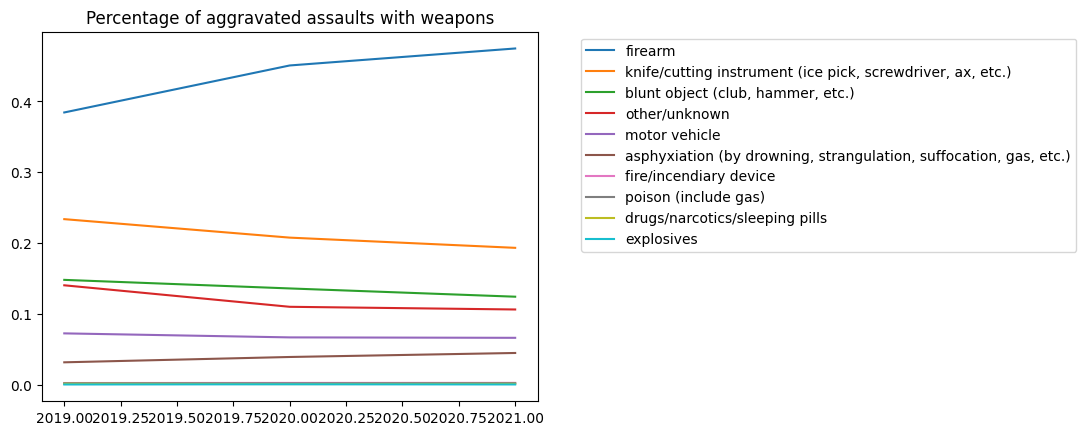

In [106]:
import matplotlib.pyplot as plt
pd.concat([w19,w20, w21], axis = 1).T.plot()
plt.legend( bbox_to_anchor=(2.1,1), loc="upper right")
plt.title("Percentage of aggravated assaults with weapons")

In [108]:
(pd.concat([w19,w20, w21], axis = 1)* 100).to_csv('aa_weapons_percentages.csv')

In [90]:
byw = aw.groupby('year')[all_weapons].sum().T
byw.head()

year,2019,2020,2021
"knife/cutting instrument (ice pick, screwdriver, ax, etc.)",32794,35449,34519
other,14563,15181,15635
"blunt object (club, hammer, etc.)",20775,23212,22207
motor vehicle,10184,11424,11845
unknown,5150,3637,3368


In [ ]:
byw.divide(byw[2019], axis=0).T.plot()
plt.legend( bbox_to_anchor=(2.1,1), loc="upper right")
plt.title("Change in number of aggravated assaults with weapons")

In [ ]:
byw.sort_values(2021, ascending = False).T.plot()
plt.legend( bbox_to_anchor=(2.1,1), loc="upper right")
plt.title("Number of aggravated assaults with weapons")

In [ ]:
assaults.loc[assaults.ucr_offense_code == "simple assault", 'firearm'].sum()

In [ ]:
assaults.unique_incident_id.value_counts().head()

In [ ]:
assaults[assaults.unique_incident_id == "AR0230100 D-M0-KC6X I"]

In [ ]:
a_counts = assaults.groupby(['year', 'ori'])['unique_incident_id'].nunique().reset_index()
a_counts.head()

In [ ]:
a_pivot = pd.pivot_table(a_counts, index = 'ori', values = 'unique_incident_id', columns ='year')
a_pivot.head()

In [ ]:
# let's merge in pop info
a_merged = pd.concat([a_pivot, pops], axis =1)
a_merged.head()

np.log(a_pivot.divide(a_pivot[2019], axis=0)).T.plot(legend=None, ylim=(-1,1), figsize=(3,3), alpha=0.02, color = "k")


In [ ]:
a_pc = calc_perc_capita(a_merged, "perc_21_19", "perc_pc_21_19")
a_pc.perc_21_19.describe(percentiles = [0.25,0.3, 0.45, 0.55, 0.6, 0.75])

In [ ]:
a_pc.perc_pc_21_19.describe(percentiles = [0.25,0.3, 0.45, 0.55, 0.6, 0.75])